# Steps 1-9

In [1]:
#Importing Libraries:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [2]:
path = r'C:\Users\javed\instacart Basket Analysis'

In [3]:
#1. Import the merged data set you exported.
df= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'fn.pkl'))

In [4]:
#2. You’ll need to address any PII data in the data before continuing your analysis.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   user_id                int64  
 1   First Name             object 
 2   Surnam                 object 
 3   Gender                 object 
 4   STATE                  object 
 5   Age                    int64  
 6   n_dependants           int64  
 7   fam_status             object 
 8   income                 int64  
 9   order_id               int64  
 10  order_number           int64  
 11  orders_day_of_week     int64  
 12  order_hour_of_day      int64  
 13  product_id             int64  
 14  product_name           object 
 15  department_id          int64  
 16  prices                 float64
 17  price_range            object 
 18  busiest_days           object 
 19  busiest_period_of_day  object 
 20  max_order              int64  
 21  loyalty_flag           object 
 22  avg_price       

The 'n_dependants' and 'fam_status' columns are the only columns that could be considered PII data, however it will not be removed because this is information that customers gave to Instacart and it is useful.

In [4]:
#3. Create a regional segmentation of the data.
def region_label(row):

  if (row['STATE'] == 'Connecticut') or (row['STATE'] == 'Vermont') or (row['STATE'] =='Maine') or (row['STATE'] == 'Rhode Island') or (row['STATE'] == 'Massachusetts') or (row['STATE'] == 'New Hampshire') or (row['STATE'] == 'New York') or (row['STATE'] == 'New Jersey') or (row['STATE'] == 'Pennsylvania'):
    return 'Northeast'
  elif (row['STATE'] == 'Wisconsin') or (row['STATE'] == 'Michigan') or (row['STATE'] == 'Illinois') or (row['STATE'] == 'Ohio') or (row['STATE'] == 'Indiana') or (row['STATE'] == 'North Dakota') or (row['STATE'] == 'South Dakota') or (row['STATE'] == 'Nebraska') or (row['STATE'] =='Kansas') or (row['STATE'] == 'Minnesota') or (row['STATE'] == 'Iowa') or (row['STATE'] == 'Missouri'):
    return 'Midwest'
  elif (row['STATE'] == 'Idaho') or (row['STATE'] == 'Wyoming') or (row['STATE'] == 'Montana') or (row['STATE'] == 'Nevada') or (row['STATE'] == 'Utah') or (row['STATE'] == 'Colorado') or (row['STATE'] == 'Arizona') or (row['STATE'] == 'New Mexico') or (row['STATE'] == 'Alaska') or (row['STATE'] == 'Washington') or (row['STATE'] == 'Oregon') or (row['STATE'] == 'California') or (row['STATE'] == 'Hawaii'):
    return 'West'
  else: return 'South'

In [5]:
df['region'] = df.apply(region_label, axis=1)

In [6]:
#4. Create an exclusion flag for low-activity customers
def exclusion_label(row):

  if row['max_order'] < 5:
    return 'Low Activity'
  else: return 'Good Activity'

In [7]:
df['activity'] = df.apply(exclusion_label, axis=1)

In [8]:
df1 = df[df['activity'] == 'Good Activity']

In [10]:
#Create an exclusion flag for low-activity customers and exclude them for the CFO:
df1.to_pickle(os.path.join(path, '02 Data', 'Prepared Data','lowact_excluded.pkl'))

In [9]:
#5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [11]:
#User-Defined Function for profiling based on age and fam_status
def cust_prof1(row):

  if (row['Age'] <= 29) and (row['fam_status'] == 'single'):
    return 'Young Single Adult'
  elif (row['Age'] >= 30) and (row['Age'] <=55) and (row['fam_status'] == 'single'):
    return 'Mid-Age Single Adult'
  elif (row['Age'] > 55) and (row['fam_status'] == 'single'):
    return 'Single Senior'
  elif (row['Age'] <= 29) and (row['fam_status'] == 'married'):
    return 'Young Married Adult'
  elif (row['Age'] >= 30) and (row['Age'] <= 55) and (row['fam_status'] == 'married'):
    return 'Mid-Age Married Adult'
  elif (row['Age'] > 55) and (row['fam_status'] == 'married'):
    return 'Married Senior'
  elif (row['Age'] <= 29) and (row['fam_status'] == 'divorced/widowed'):
    return 'Young Divorced/Widowed Adult'
  elif (row['Age'] >= 30) and (row['Age'] < 55) and (row['fam_status'] == 'divorced/widowed'):
    return 'Mid-Age Divorced/Widowed Adult'
  elif (row['Age'] > 55) and (row['fam_status'] == 'divorced/widowed'):
    return 'Divorced/Widowed Senior'
  elif (row['Age'] > 18) and (row['fam_status'] == 'living with parents and siblings'):
    return 'Lives with parents/siblings'
  else: return 'Young/Mid-Age Divorced/Widowed Adults'

In [12]:
df['age_fam_profile'] = df.apply(cust_prof1, axis =1)

In [13]:
#User Defined Function for profiling based on income, and number of dependants.
def cust_prof(row):

  if (row['income'] <= 35999) and (row['n_dependants'] == 0):
    return 'Low Income/ No Dependants'
  elif (row['income'] >= 36000) and (row['income'] <=99999) and (row['n_dependants'] == 0):
    return 'Middle Income/ No Dependants'
  elif (row['income'] > 99999) and (row['income'] <= 209999) and (row['n_dependants'] == 0):
    return 'Good-High Income/ No Dependants'
  elif (row['income'] >= 210000) and (row['n_dependants'] == 0):
    return 'Wealthy/ No Dependants'
  elif (row['income'] <= 35999) and (row['n_dependants'] >= 1) and (row['n_dependants'] <=3):
    return 'Low Income/ One or More Dependants'
  elif (row['income'] >= 36000) and (row['income'] <=99999) and (row['n_dependants'] >= 1) and (row['n_dependants'] <=3):
    return 'Middle Income/ One or More Dependants'
  elif (row['income'] > 99999) and (row['income'] <=209999) and (row['n_dependants'] >= 1) and (row['n_dependants'] <=3):
    return 'Good-High Income/ One or More Dependants'
  elif (row['income'] >=210000) and (row['n_dependants'] >=1) and (row['n_dependants'] <= 3):
    return 'Wealthy/ One or More Dependants'

In [14]:
df['income_dep_prof'] = df.apply(cust_prof, axis=1)

In [16]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final.pkl'))

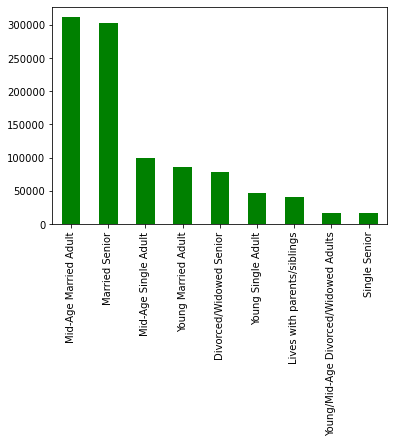

In [17]:
#6. Create an appropriate visualization to show the distribution of profiles.
bar1 = df['age_fam_profile'].value_counts().plot.bar(color = 'green')

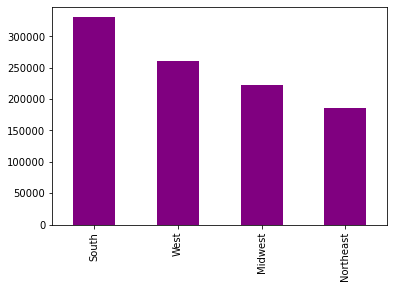

In [18]:
bar2 = df['region'].value_counts().plot.bar(color = 'purple')

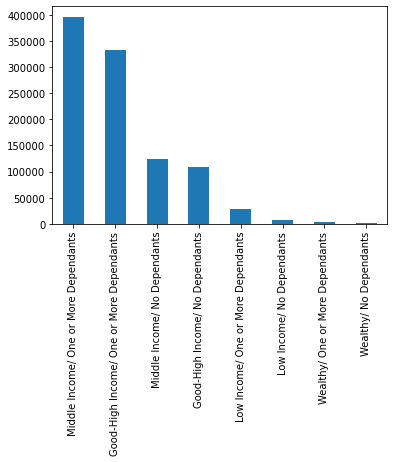

In [19]:
bar3 = df['income_dep_prof'].value_counts().plot.bar()

In [20]:
#7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
df.groupby('spending_flag').agg({'prices' : ['mean', 'max', 'min']})

prices              
                     mean      max  min
spending_flag                          
High Spender   184.511287  99999.0  1.0
Low Spender      7.761482     25.0  1.0

In [21]:
#8. Compare your customer profiles with regions and departments. 
df['region'].value_counts(dropna = False)

South        330222
West         261100
Midwest      222311
Northeast    186367
Name: region, dtype: int64

South is the largest region 

In [22]:
df['department_id'].value_counts(dropna = False)

4     293193
16    165397
19     89959
7      81973
1      69971
13     57449
3      35196
15     33475
20     33297
9      26391
17     23218
14     21562
12     21322
11     14026
18     13233
6       8628
5       4384
8       3184
21      1936
2       1145
10      1061
Name: department_id, dtype: int64

Department #4 is the highest selling department

In [23]:
df['age_fam_profile'].value_counts(dropna = False)

Mid-Age Married Adult                    311716
Married Senior                           303154
Mid-Age Single Adult                      99147
Young Married Adult                       86377
Divorced/Widowed Senior                   78613
Young Single Adult                        46038
Lives with parents/siblings               41227
Young/Mid-Age Divorced/Widowed Adults     17153
Single Senior                             16575
Name: age_fam_profile, dtype: int64

Mid-age married adults are the largest demographic

In [24]:
#Creating subsets that will be joined together:
df1= df[df['region']== 'South']

In [25]:
df2= df[df['department_id']==4]

In [26]:
df3 = df[df['age_fam_profile']== 'Mid-Age Married Adult']

In [27]:
#Merging the first 2 data sets:
merged1= df1.merge(df2, how = 'inner')

In [28]:
merged_df = merged1.merge(df3, how = 'inner')

In [29]:
merged_df.head()

,user_id,First Name,Surnam,Gender,STATE,Age,n_dependants,fam_status,income,order_id,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,region,activity,age_fam_profile,income_dep_prof
0,133128,Cynthia,Noble,Female,Kentucky,43,2,married,49643,1723820,...,Regularly Busy,Average Orders,7,New Customer,6.806667,Low Spender,South,Good Activity,Mid-Age Married Adult,Middle Income/ One or More Dependants
1,133128,Cynthia,Noble,Female,Kentucky,43,2,married,49643,1723820,...,Regularly Busy,Average Orders,7,New Customer,6.806667,Low Spender,South,Good Activity,Mid-Age Married Adult,Middle Income/ One or More Dependants
2,69965,Jeremy,Vang,Male,Texas,47,1,married,162432,535198,...,Busiest Days,Average Orders,15,Regular Customer,8.286667,Low Spender,South,Good Activity,Mid-Age Married Adult,Good-High Income/ One or More Dependants
3,69965,Jeremy,Vang,Male,Texas,47,1,married,162432,3248623,...,Regularly Busy,Average Orders,15,Regular Customer,8.286667,Low Spender,South,Good Activity,Mid-Age Married Adult,Good-High Income/ One or More Dependants
4,69965,Jeremy,Vang,Male,Texas,47,1,married,162432,3248623,...,Regularly Busy,Average Orders,15,Regular Customer,8.286667,Low Spender,South,Good Activity,Mid-Age Married Adult,Good-High Income/ One or More Dependants


In [30]:
#9. Produce suitable charts to illustrate your results and export them in your project folder.
bar1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar1.png'))

In [31]:
bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar2.png'))

In [32]:
bar3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar3.png'))

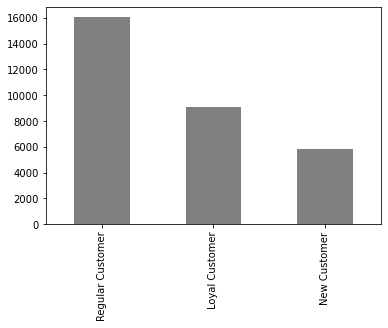

In [33]:
bar_subset1 = merged_df['loyalty_flag'].value_counts().plot.bar(color = 'grey')

In [ ]:
bar_subset2 = merged_df['product_name'].value_counts().plot.bar()

In [ ]:
barsub3 = merged_df['income_dep_prof'].value_counts().plot.bar()

In [36]:
bar_subset1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_sub1.png'))

In [37]:
bar_subset2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_sub2.png'))

In [38]:
barsub3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'barsub3.png'))